# Classification

The following tutorial contains Python examples for solving classification problems. You should refer to the Chapters 3 and 4 of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial.

Classification is the task of predicting a nominal-valued attribute (known as class label) based on the values of other attributes (known as predictor variables). The goals for this tutorial are as follows:
1. To provide examples of using different classification techniques from the scikit-learn library package.
2. To demonstrate the problem of model overfitting.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.


## 6.1 Vertebrate Dataset

We use a variation of the vertebrate data described in Example 3.1 of Chapter 3. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a *one hot encoding* binary representation. To illustrate this, we will first load the data into a Pandas DataFrame object and display its content.

In [14]:
import pandas as pd

data = pd.read_csv('data/vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


Given the limited number of training examples, suppose we convert the problem into a binary classification task (mammals versus non-mammals). We can do so by replacing the class labels of the instances to *non-mammals* except for those that belong to the *mammals* class.

Remark: Fishes, birds, amphibians and reptiles are non-mammals.

We can apply Pandas cross-tabulation to examine the relationship between the Warm-blooded and Gives Birth attributes with respect to the class. 

The results above show that it is possible to distinguish mammals from non-mammals using these two attributes alone since each combination of their attribute values would yield only instances that belong to the same class. For example, mammals can be identified as warm-blooded vertebrates that give birth to their young. Such a relationship can also be derived using a decision tree classifier, as shown by the example given in the next subsection.

## 3.2 Decision Tree Classifier

In this section, we apply a decision tree classifier to the vertebrate dataset described in the previous subsection. 

Write the commands to extract the predictor (X) and target class (Y) attributes from the vertebrate dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'gini' as impurity measure. The classifier should be also constrained to generate trees with a maximum depth equals to 3. Next, the classifier is trained on the labeled data using the fit() function. 

In [ ]:
from sklearn import tree


We can plot the resulting decision tree obtained after training the classifier. To do this, use the graphviz Python interface called pydotplus (http://pydotplus.readthedocs.io/).

In [ ]:
import pydotplus 
from IPython.display import Image

Next, suppose we apply the decision tree to classify the following test examples.

In [15]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

Except for platypus, which is an egg-laying mammal, the classifier correctly predicts the class label of the test examples. We can calculate the accuracy of the classifier on the test data.

In [ ]:
from sklearn.metrics import accuracy_score

## 3.3 Model Overfitting

To illustrate the problem of model overfitting, we consider a two-dimensional dataset containing 1500 labeled instances, each of which is assigned to one of two classes, 0 or 1. Instances from each class are generated as follows:
1. Instances from class 1 are generated from a mixture of 3 Gaussian distributions, centered at [6,14], [10,6], and [14 14], respectively. 
2. Instances from class 0 are generated from a uniform distribution in a square region, whose sides have a length equals to 20.

For simplicity, both classes have equal number of labeled instances. The code for generating and plotting the data is shown below. All instances from class 1 are shown in red while those from class 0 are shown in black.

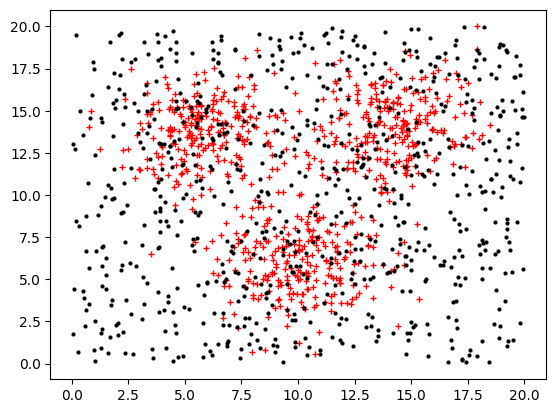

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

# number of samples
N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance (variance=3.5 per dim)

np.random.seed(50)

# --- create the Gaussian mixture (class 1) ---
# int(N/6) = 1500/6 = 250 samples per Gaussian
X = np.random.multivariate_normal(mean1, cov, int(N/6))                      # 250 samples from Gaussian centered at mean1
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6)))) # +250 from Gaussian centered at mean2 -> 500 total
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6)))) # +250 from Gaussian centered at mean3 -> 750 total

# --- create the uniform background (class 0) ---
# int(N/2) = 750 uniform samples in [0,20) for each coordinate
X = np.concatenate((X, 20*np.random.rand(int(N/2), 2)))                       # +750 uniform samples -> 1500 total

# Labels: first 750 are class 1, next 750 are class 0
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))               

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In this example, we reserve 80% of the labeled data for training and the remaining 20% for testing. We then fit decision trees of different maximum depths (from 2 to 50) to the training set and plot their respective accuracies when applied to the training and test sets. 

In [ ]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split



#########################################
# Model fitting and evaluation
#########################################

from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Different max tree depths to try
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    # Create Decision Tree Classifier object with given max depth
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

The plot above shows that training accuracy will continue to improve as the maximum depth of the tree increases (i.e., as the model becomes more complex). However, the test accuracy initially improves up to a maximum depth of 5, before it gradually decreases due to model overfitting.

## 3.4 Alternative Classification Techniques

Besides decision tree classifier, the Python sklearn library also supports other classification techniques. In this section, we provide examples to illustrate how to apply the k-nearest neighbor classifier, linear classifiers (logistic regression and support vector machine), as well as ensemble methods (boosting, bagging, and random forest) to the 2-dimensional data given in the previous section.

### 3.4.1 K-Nearest neighbor classifier

In this approach, the class label of a test instance is predicted based on the majority class of its *k* closest training instances. The number of nearest neighbors, *k*, is a hyperparameter that must be provided by the user, along with the distance metric. By default, we can use Euclidean distance (which is equivalent to Minkowski distance with an exponent factor equals to p=2):

\begin{equation*}
\textrm{Minkowski distance}(x,y) = \bigg[\sum_{i=1}^N |x_i-y_i|^p \bigg]^{\frac{1}{p}}
\end{equation*}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

#for k in numNeighbors:


plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

### 3.4.2 Linear Classifiers

Linear classifiers such as logistic regression and support vector machine (SVM) constructs a linear separating hyperplane to distinguish instances from different classes. 

For logistic regression, the model can be described by the following equation:
\begin{equation*}
P(y=1|x) = \frac{1}{1 + \exp^{-w^Tx - b}} = \sigma(w^Tx + b)
\end{equation*}
The model parameters (w,b) are estimated by optimizing the following regularized negative log-likelihood function:
\begin{equation*}
(w^*,b^*) = \arg\min_{w,b} - \sum_{i=1}^N y_i \log\bigg[\sigma(w^Tx_i + b)\bigg] + (1-y_i) \log\bigg[\sigma(-w^Tx_i - b)\bigg] + \frac{1}{C} \Omega([w,b])
\end{equation*}
where $C$ is a hyperparameter that controls the inverse of model complexity (smaller values imply stronger regularization, it controls how strongly the model is penalized for large weights) while $\Omega(\cdot)$ is the regularization term, which by default, is assumed to be an $l_2$-norm in sklearn.

In [ ]:
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []

#for param in C:


fig, ax = plt.subplots(figsize=(12,6))
ax.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc, 'bv--')
ax.legend(['Training Accuracy','Test Accuracy'])
ax.set_xlabel('C')
ax.set_xscale('log')
ax.set_ylabel('Accuracy')

Note that linear classifiers perform poorly on the data since the true decision boundaries between classes are nonlinear for the given 2-dimensional dataset.

### 3.4.4 Ensemble Methods

An ensemble classifier constructs a set of base classifiers from the training data and performs classification by taking a vote on the predictions made by each base classifier. We consider 3 types of ensemble classifiers in this example: bagging, boosting, and random forest. Detailed explanation about these classifiers can be found in Section 4.10 of the book.

In the example below, we fit 500 base classifiers to the 2-dimensional dataset using each ensemble method. The base classifier corresponds to a decision tree with maximum depth equals to 10.

In [ ]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax1.set_title('Training Accuracy')
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
ax2.set_title('Test Accuracy')

## 3.5 Summary

This section provides several examples of using Python sklearn library to build classification models from a given input data. We also illustrate the problem of model overfitting and show how to apply different classification methods to the given dataset.